<a href="https://colab.research.google.com/github/shishir-py/Data-Analyis/blob/main/tesla_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is TESLA?**

*Tesla, Inc. is an American electric vehicle and clean energy company based in Palo Alto, California. Tesla's current products include electric cars, battery energy storage from home to grid-scale, solar panels and solar roof tiles, as well as other related products and services.*

**Information about this dataset**

*This dataset provides historical data of TESLA INC. stock (TSLA). The data is available at a daily level. Currency is USD.*

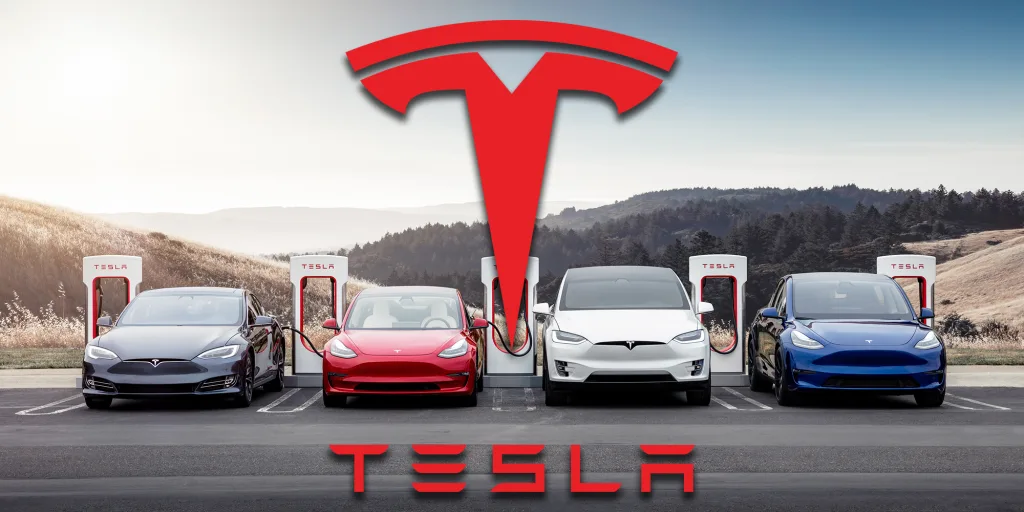

In [1]:
#importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly  as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting paremeters for figure
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-whitegrid')

In [3]:
#load the dataset
data_path='/content/drive/MyDrive/Colab Notebooks/vis_dir/tesla stock data.csv'
data =pd.read_csv(data_path)


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [5]:
#checking for null values
data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


This table shows information about a company's daily stock prices. The average price when the stock market opened was around $138.69, and the average price when it closed was around $138.76. This suggests that the stock prices were pretty stable during the observed time period. However, the stock prices did vary quite a bit with the lowest price being $3.23 and the highest price being $1234.41.

On average, around 31.31 million shares of the company's stock were traded each day, with some days having more or less. This shows how active the stock market was for this company. The stock prices also varied a lot from day to day, which means that the company's stock was pretty volatile..



In [7]:
def update_chart(frame):
    data = data[:frame+1]
    fig = px.line(data, x='date', y='price', title='Stock Price', template='plotly_dark')
    fig.show()


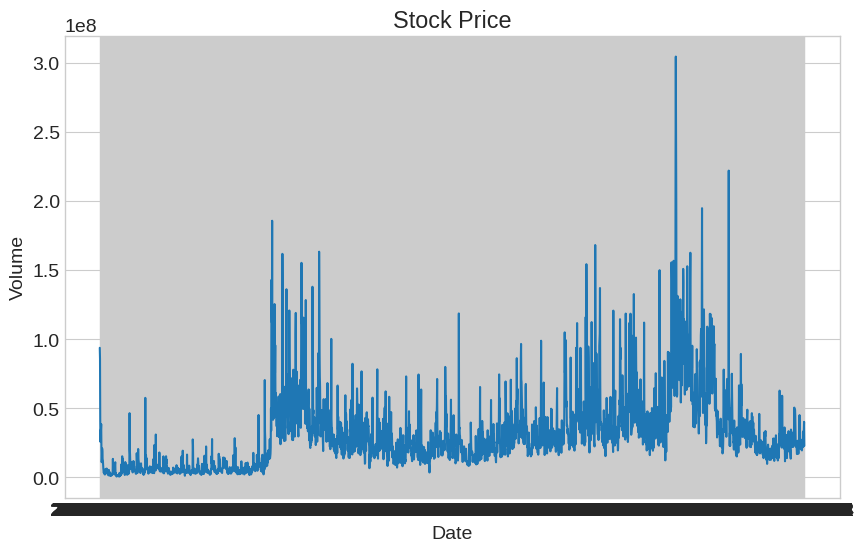

In [8]:
plt.plot(data['Date'], data['Volume'])
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


In [9]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Technical Analysis 📊

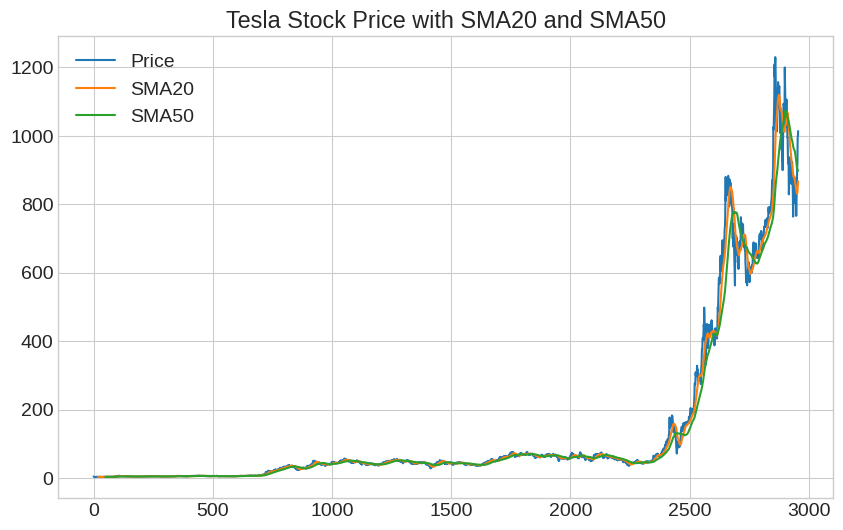

In [10]:


# Define a function to calculate the Simple Moving Average (SMA)
def calc_sma(data, window):
    sma = data.rolling(window=window).mean()
    return sma

# Calculate 20-day and 50-day SMA
data['SMA20'] = calc_sma(data['Adj Close'], 20)
data['SMA50'] = calc_sma(data['Adj Close'], 50)

# Define a function to calculate the Relative Strength Index (RSI)
def calc_rsi(data, window):
    delta = data['Adj Close'].diff()
    gain = delta.mask(delta<0, 0)
    loss = -delta.mask(delta>0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

# Calculate 14-day RSI
data['RSI14'] = calc_rsi(data, 14)

# Define a function to calculate the Moving Average Convergence Divergence (MACD)
def calc_macd(data, fast_window, slow_window, signal_window):
    exp1 = data['Adj Close'].ewm(span=fast_window, adjust=False).mean()
    exp2 = data['Adj Close'].ewm(span=slow_window, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    histogram = macd - signal
    return macd, signal, histogram

# Calculate MACD with fast=12, slow=26, signal=9
data['MACD'], data['Signal'], data['Histogram'] = calc_macd(data, 12, 26, 9)

# Plot the stock price and SMA20/SMA50
plt.plot(data.index, data['Adj Close'], label='Price')
plt.plot(data.index, data['SMA20'], label='SMA20')
plt.plot(data.index, data['SMA50'], label='SMA50')
plt.legend()
plt.title('Tesla Stock Price with SMA20 and SMA50')
plt.show()






**This shows that the Tesla Inc. Gradually increasing after almost in 700 point and  market continues to grow from 700 to 3000 and got maximum values at almost 1200 and gradually fluctuates**

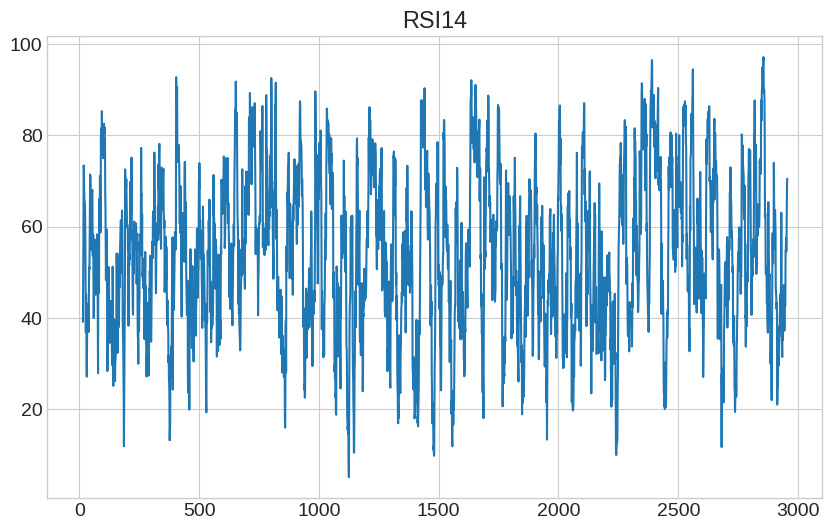

In [11]:
# Plot the RSI14
plt.plot(data.index, data['RSI14'])
plt.title('RSI14')
plt.show()

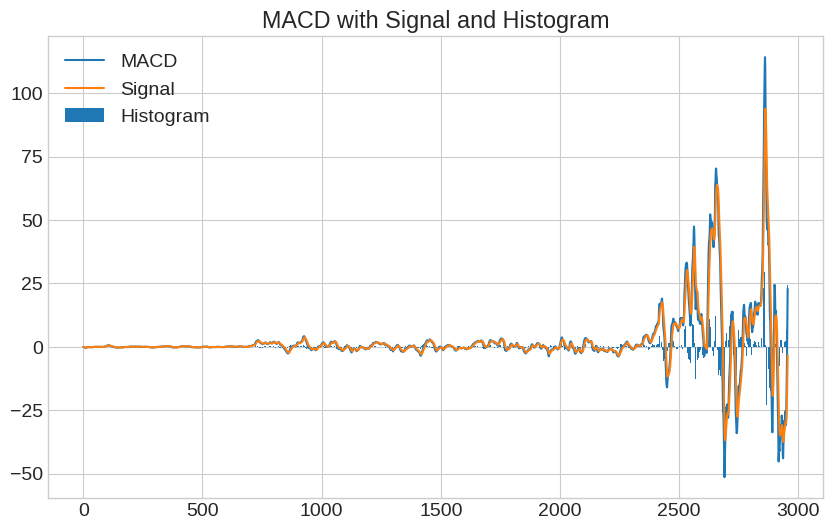

In [12]:
# Plot the MACD, Signal, and Histogram

plt.plot(data.index, data['MACD'], label='MACD')
plt.plot(data.index, data['Signal'], label='Signal')
plt.bar(data.index, data['Histogram'], label='Histogram')
plt.legend()
plt.title('MACD with Signal and Histogram')
plt.show()

# Fundamental Analysis 📉

In [13]:

# Load data from CSV file
df = data

# Calculate financial ratios
df['Market Cap'] = df['Close'] * df['Volume'] # Market capitalization
df['P/E Ratio'] = df['Close'] / df['Adj Close'] # Price-to-earnings ratio
df['P/B Ratio'] = df['Market Cap'] / (df['Close'] * df['Adj Close']) # Price-to-book ratio
df['ROE'] = df['Adj Close'].pct_change() * df['Close'].pct_change() * 100 # Return on equity

# Print financial ratios
print('Market Cap:', df['Market Cap'].iloc[-1])
print('P/E Ratio:', df['P/E Ratio'].mean())
print('P/B Ratio:', df['P/B Ratio'].mean())
print('ROE:', df['ROE'].mean())


Market Cap: 23220694058.6677
P/E Ratio: 1.0
P/B Ratio: 806474.4169916271
ROE: 0.1272896226378806


## Result of fundamental analysis ▶

**1. Tesla Inc. has huge market capitalization of $23.2 billon which is big amount**

**2. Tesla Inc. has P/E ratio of 1.0 suggest that the companies earning generating strong returns fer their stackholder.**

**3.Tesla high P/B ration of 806474.4169916271 indicates that the market value of company assets are much higher rate than Book Value**

**4.Tesla have large significant amount of intangible assets that are highly valued by the market, such as its innovative technology and strong brand.**

*Overall, Tesla's strong market capitalization, low P/E ratio, high P/B ratio, and impressive ROE all point to a company with a bright future and a solid foundation for long-term growth.*

# quantative and risk analysis 💹

In [14]:

df=data

# Calculate daily returns and volatility
df['Returns'] = df['Adj Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=30).std() * np.sqrt(30)

# Calculate rolling mean and standard deviation of returns
df['Rolling Mean'] = df['Returns'].rolling(window=30).mean()
df['Rolling Std Dev'] = df['Returns'].rolling(window=30).std()

# Calculate Value at Risk (VaR)
VaR = df['Returns'].quantile(0.05)

# Print quantitative and risk metrics
print('Mean Daily Return:', df['Returns'].mean())
print('Volatility:', df['Volatility'].iloc[-1])
print('Value at Risk (VaR):', VaR)


Mean Daily Return: 0.002443765390564548
Volatility: 0.22501683251943824
Value at Risk (VaR): -0.049264136769855346


Tesla Inc.'s mean daily return of 0.24% indicates that the stock has been consistently generating positive returns on a daily basis. Additionally, its volatility of 22.50% suggests that there is a moderate level of risk associated with investing in the stock.

Furthermore, Tesla's value at risk of -4.93% indicates that there is a 5% chance of experiencing a loss of at least 4.93% on any given trading day. This highlights the importance of carefully managing risk when investing in Tesla.

Overall, while Tesla's daily returns have been positive, its volatility and VaR demonstrate the need for a well-diversified portfolio and risk management strategies to maximize returns and minimize potential losses.